## Best results: 0.79904 - Top 5%

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Import Data

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('../input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.shape, test.shape)

(891, 12) (418, 11)


### Explore Target Variable



**Class Imbalance**

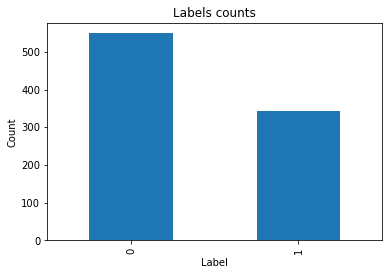

In [5]:
train['Survived'].value_counts().plot(kind='bar')
plt.title('Labels counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [6]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train.Survived),
                                                 train.Survived)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print(class_weights)

{0: 0.8114754098360656, 1: 1.3026315789473684}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1], y=0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


# Data Preprocessing

In [7]:
# Save the 'PassengerId' column
train_ID = train['PassengerId']
test_ID = test['PassengerId']

#Now drop the  'PassengerId' colum since it's unnecessary for  the prediction process.
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

#check again the data size after dropping the 'PassengerId' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (891, 11) 
The test data size after dropping Id feature is : (418, 10) 


In [8]:
# Merge train set and test set

ntrain = train.shape[0]
ntest = test.shape[0]

train_labels = train['Survived'].copy()
train = train.drop('Survived', axis=1)

all_data = pd.concat((train, test)).reset_index(drop=True)

all_data


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


### Numerical variables

In [10]:
all_data_num = all_data.select_dtypes(exclude=['object'])
all_data_num

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
1304,3,NaN,0,0,8.0500
1305,1,39.0,0,0,108.9000
1306,3,38.5,0,0,7.2500
1307,3,NaN,0,0,8.0500


### Categorical variables


In [11]:
all_data_cat = all_data.select_dtypes(include=['object'])
all_data_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S
1307,"Ware, Mr. Frederick",male,359309,NaN,S


### Transformation Pipelines

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])


cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehotcode',  OneHotEncoder())
])

In [13]:
from sklearn.compose import ColumnTransformer

num_attribs = list(all_data_num.columns)
cat_attribs = list(all_data_cat.columns)

full_pipeline = ColumnTransformer([
    ('num', num_pipe, num_attribs),
    ('cat', cat_pipe, cat_attribs)
])

all_data_prepared = full_pipeline.fit_transform(all_data)

### Split Data

In [14]:
train_data = all_data_prepared[:ntrain]
test_data = all_data_prepared[ntrain:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, random_state=42)

## Training


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(class_weight = class_weights)

param_grid = {'max_iter': [2000],
             'penalty': ['l1', 'l2'],
             'C': np.logspace(-4,4,20),
             'solver': ['liblinear']}
clf_lr = GridSearchCV(logreg, param_grid, cv = 5, verbose = 1, n_jobs = -1)
bestF = clf_lr.fit(train_data, train_labels)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [16]:
bestF.best_score_

0.8293955181721173

In [17]:
bestF.best_params_

{'C': 1438.44988828766,
 'max_iter': 2000,
 'penalty': 'l2',
 'solver': 'liblinear'}

### Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(class_weight = class_weights)

scores = cross_val_score(decision_tree, train_data, train_labels, scoring ='accuracy', cv=10)
scores.mean()

0.8193383270911362

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(random_state = 42)
n_estimators = [5, 10, 50, 100]
max_depth = [3,5, 8, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_data, train_labels)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


In [20]:
bestF.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [21]:
bestF.best_score_

0.809203142536476

In [22]:
forest = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)

In [23]:
scores = cross_val_score(forest, train_data, train_labels, scoring ='accuracy', cv=5)
scores.mean()

0.8081413596133326

### Support Vector Machine

In [24]:
from sklearn.svm import SVC
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_clas= SVC(class_weight = class_weights)
grid_search = GridSearchCV(svm_clas, param_grid, cv=5,verbose=2)
grid_search.fit(train_data, train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5,
             estimator=SVC(class_weight={0: 0.8114754098360656,
                                         1: 1.3026315789473684}),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             verbose=2)

In [25]:
grid_search.best_params_

{'C': 30.0, 'gamma': 0.03, 'kernel': 'rbf'}

In [26]:
grid_search.best_score_

0.8507187244994036

In [27]:
svc = SVC(C=30.0, gamma=0.03, class_weight = class_weights)
scores = cross_val_score(svc, train_data, train_labels, scoring ='accuracy', cv=10)
scores.mean()

0.8473533083645443

### Prediction

In [28]:
svc.fit(train_data, train_labels)

results = svc.predict(test_data)
results

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
sub = pd.DataFrame()
sub['PassengerId'] = test_ID
sub['Survived'] = results
sub.to_csv('submission.csv',index=False)